# Task 1 - Cleaning the Dataset

In [1]:
import services.dataframe_service as dataframe_service
from repos.path_repo import file_path
from repos.path_repo import assignment_output_path

data_frame = dataframe_service.read_csv(file_path)

clean_data_frame = dataframe_service.clean_up_data_frame(data_frame)

dataframe_service.to_csv(clean_data_frame, assignment_output_path)

2024-09-05 01:26:10 - INFO - Function - clean_up_data_frame - Done.
2024-09-05 01:26:10 - INFO - Dataset saved as assignment_output.csv


# Task 2 - Handling missing values

Handling missing URLs:

In [2]:
import services.gpt_service as gpt_service
import services.dataframe_service as dataframe_service
import services.logging_service as log
import json
from repos.prompt_repo import find_official_website_prompt 
from repos.path_repo import assignment_output_path

# Load the dataset
data_frame = dataframe_service.read_csv(assignment_output_path)

missing_urls = dataframe_service.generate_company_data_by_missing_feature(data_frame,'homepage_url',['market'])

if len(missing_urls) != 0:
    formatted_json = json.dumps(missing_urls, indent = 2)
    log.info("Number of companies with missing homepage_urls: " + str(len(missing_urls)))
    log.info(f"Companies with missing homepage_urls:\n {formatted_json}")


# Pass key_value_pairs to get_homepageurl and save its output as generated_URLs
    generated_URLs = gpt_service.run_chat(find_official_website_prompt , missing_urls)
    log.info(f"The model mapped the following websites to the these companies: \n {generated_URLs}")

    data_frame = dataframe_service.update_dataframe(data_frame,generated_URLs,'homepage_url')

    # Save the updated dataset if needed
    dataframe_service.to_csv(data_frame, assignment_output_path)

else:
    log.info(f"No companies are missing their homepage_url in {assignment_output_path}.")

2024-09-05 01:26:13 - INFO - generate_company_data_by_missing_feature - Done.
2024-09-05 01:26:13 - INFO - Number of companies with missing homepage_urls: 39
2024-09-05 01:26:13 - INFO - Companies with missing homepage_urls:
 [
  {
    "company_name": "Invivodata",
    "crunchbase_url": "https://www.crunchbase.com/organization/invivodata",
    "market": "Health and Wellness"
  },
  {
    "company_name": "Across The Universe",
    "crunchbase_url": "https://www.crunchbase.com/organization/across-the-universe",
    "market": "Games"
  },
  {
    "company_name": "Hear It First",
    "crunchbase_url": "https://www.crunchbase.com/organization/hear-it-first",
    "market": NaN
  },
  {
    "company_name": "EG Technology",
    "crunchbase_url": "https://www.crunchbase.com/organization/eg-technology",
    "market": NaN
  },
  {
    "company_name": "Novast Laboratories",
    "crunchbase_url": "https://www.crunchbase.com/organization/novast-laboratories",
    "market": "Biotechnology"
  },
  {
 

Handling missing status:

In [5]:
import services.gpt_service as gpt_service
import services.dataframe_service as dataframe_service
import services.logging_service as log
from repos.prompt_repo import find_comnpany_status_prompt 
from repos.path_repo import assignment_output_path


# Load the dataset
data_frame = dataframe_service.read_csv(assignment_output_path)
missing_statuses = dataframe_service.generate_company_data_by_missing_feature(data_frame,'status',[])

if len(missing_statuses) != 0:
    formatted_json = json.dumps(missing_statuses, indent = 2)
    log.info("Number of companies with missing status: " + str(len(missing_statuses)))
    log.info(f"Companies with missing status: \n{formatted_json}")

    # Pass key_value_pairs to get_homepageurl and save its output as generated_URLs
    generated_statuses = gpt_service.run_chat(find_comnpany_status_prompt, missing_statuses)
    log.info(f"The model mapped the following statuses to the these companies:\n {generated_statuses}")

    data_frame = dataframe_service.update_dataframe(data_frame,generated_statuses,'status')

    # Save the updated dataset if needed
    dataframe_service.to_csv(data_frame,assignment_output_path)
else:
    log.info(f"No companies are missing their status in {assignment_output_path}.")

2024-09-05 01:27:49 - INFO - generate_company_data_by_missing_feature - Done.
2024-09-05 01:27:49 - INFO - No companies are missing their status in {assignment_output_path}.


Handle missing Cities:

In [3]:
import services.gpt_service as gpt_service
import services.dataframe_service as dataframe_service
import services.logging_service as log
from unidecode import unidecode
import pandas as pd
from repos.prompt_repo import find_company_HQ_city_prompt 
from repos.path_repo import assignment_output_path

# Load the dataset
data_frame = dataframe_service.read_csv(assignment_output_path)
missing_cities = dataframe_service.generate_company_data_by_missing_feature(data_frame,'city',[])

if len(missing_cities) != 0:
    formatted_json = json.dumps(missing_cities, indent = 2)

    log.info("Number of companies with missing cities: " + str(len(missing_cities)))
    log.info(f"Companies with missing city:\n{formatted_json}")

    # Pass key_value_pairs to get_homepageurl and save its output as generated_URLs
    generated_cities = gpt_service.run_chat(find_company_HQ_city_prompt, missing_cities)


    log.info(f"The model mapped the following cities to the these companies:\n{generated_cities}")

    data_frame = dataframe_service.update_dataframe(data_frame,generated_cities,'city')
    data_frame['city'] = data_frame['city'].apply(lambda x: unidecode(x) if pd.notnull(x) else x)

    dataframe_service.to_csv(data_frame, assignment_output_path)

else:
    log.info(f"No missing company statuses found in {assignment_output_path}.")


2024-09-05 01:41:31 - INFO - generate_company_data_by_missing_feature - Done.
2024-09-05 01:41:31 - INFO - No missing company statuses found in {assignment_output_path}.


# Task 3 - Adding a new feature

Adding street feature

In [2]:
import services.gpt_service as gpt_service
import json
import services.dataframe_service as dataframe_service
import services.logging_service as log
from repos.prompt_repo import find_company_HQ_street_prompt 
from repos.path_repo import assignment_output_path

# Load the dataset
data_frame = dataframe_service.read_csv(assignment_output_path)
if 'street' not in data_frame.columns:
    dataframe_service.insert_column_after_column(data_frame,'city','street')

dataframe_service.to_csv(data_frame, assignment_output_path)
log.info("Added street column to assignment_output.csv")

# Filter out rows where homepage_url is NaN and company_name and permalink are not NaN
companies_and_their_cities = data_frame[['company_name', 'city']].dropna().set_index('company_name')['city'].to_dict()

if len(companies_and_their_cities) != 0:
    formatted_json = json.dumps(companies_and_their_cities, indent = 2)
    log.info("Below is the information the model will use to find the street the company's HQ located in.")
    log.info(f"The key represents the company name and the value is the city:\n{formatted_json}")

    # Pass key_value_pairs to get_homepageurl and save its output as generated_URLs
    generated_streets = gpt_service.run_chat(find_company_HQ_street_prompt, companies_and_their_cities)
    log.info(f"\nThe model mapped the following streets to the these companies:\n{generated_streets}")


    updated_data_frame = dataframe_service.update_dataframe(data_frame, str(generated_streets), 'street')

    # Save the updated dataset if needed
    dataframe_service.to_csv(updated_data_frame, assignment_output_path)

else:
    log.info(f"No missing company streets found in {assignment_output_path}.")


2024-09-05 01:33:40 - INFO - Dataset saved as assignment_output.csv
2024-09-05 01:33:40 - INFO - Added street column to assignment_output.csv
2024-09-05 01:33:40 - INFO - Below is the information the model will use to find the street the company's HQ located in.
2024-09-05 01:33:40 - INFO - The key represents the company name and the value is the city:
{
  "Experifun": "Bangalore",
  "LoopPay": "Woburn",
  "Quisk": "Sunnyvale",
  "Todaytickets": "Berlin",
  "Fooboo": "Munchen",
  "Get Me Listed": "Montreal",
  "Nerdies": "Fayetteville",
  "Micron Technology": "Boise",
  "hotelsmap.com": "Dubai",
  "Zidisha": "Sterling",
  "Musiwave": "Paris",
  "2Duche": "Shanghai",
  "ShadesCases inc.": "Centennial",
  "HTG Molecular Diagnostics": "Tucson",
  "UpTo": "Detroit",
  "TonZof": "Lakewood",
  "Go Kin Packs": "Thunder Bay",
  "B-Side Entertainment": "New York",
  "Invivodata": "Pittsburgh",
  "sim4tec": "Dresden",
  "EcoIntense": "Berlin",
  "YOYO Holdings": "Singapore",
  "e-SENS": "Salt La

# Task 4 - Insights

Instight #1 - List of cities and the number of times each city appears in the dataset.

In [3]:
import services.dataframe_service as dataframe_service
import services.sql_service as sql_service
from repos.path_repo import assignment_output_path


data_frame = dataframe_service.read_csv(assignment_output_path)

query = """
SELECT 
    city, 
    COUNT(*) AS city_count
FROM 
    company_info
GROUP BY 
    city
ORDER BY 
    city_count DESC;
"""

results = sql_service.run_sql_query(data_frame,query)
print("List of cities and the number of times each city appears:")
print(results)



2024-09-05 01:34:35 - INFO - Function - run_sql_query - Done


List of cities and the number of times each city appears:
              city  city_count
0    San Francisco          34
1         New York          33
2           London          11
3          Seattle           7
4           Boston           7
..             ...         ...
242       Aventura           1
243      Ann Arbor           1
244        Andover           1
245      Amsterdam           1
246          Acton           1

[247 rows x 2 columns]


Insight #2 - Extracting domain from homepage_url

In [4]:
import services.dataframe_service as dataframe_service
import services.sql_service as sql_service
from repos.path_repo import assignment_output_path


data_frame = dataframe_service.read_csv(assignment_output_path)

query = """
SELECT 
    company_name, 
    CASE
        WHEN INSTR(homepage_url, 'www.') > 0 THEN 
            SUBSTR(homepage_url, INSTR(homepage_url, 'www.') + 4, 
            INSTR(SUBSTR(homepage_url, INSTR(homepage_url, 'www.') + 4), '.') - 1)
        ELSE 
            SUBSTR(homepage_url, INSTR(homepage_url, '//') + 2, 
            INSTR(SUBSTR(homepage_url, INSTR(homepage_url, '//') + 2), '.') - 1)
    END AS main_domain
FROM company_info;
"""


results = sql_service.run_sql_query(data_frame,query)
print("List of cities and the number of times each city appears:")
print(results)


2024-09-05 01:34:39 - INFO - Function - run_sql_query - Done


List of cities and the number of times each city appears:
                   company_name               main_domain
0                     Experifun                 experifun
1                       LoopPay                   looppay
2                         Quisk                     quisk
3                  Todaytickets              todaytickets
4                        Fooboo                    fooboo
..                          ...                       ...
443                   SCS Group                  groupscs
444  Londons Holiday Apartments  londonsholidayapartments
445             Empire Genomics            empiregenomics
446                        KODA                      koda
447                    Stackops                  stackops

[448 rows x 2 columns]


Insight #3 - The company with the most and the least amount of funding

In [5]:
import services.dataframe_service as dataframe_service
import services.sql_service as sql_service
from repos.path_repo import assignment_output_path


data_frame = dataframe_service.read_csv(assignment_output_path)

query = """
SELECT 
    company_name, 
    MAX(funding_total_usd) AS funding_amount 
FROM company_info

UNION ALL

SELECT 
    company_name, 
    MIN(funding_total_usd) AS funding_amount 
FROM company_info;
"""


results = sql_service.run_sql_query(data_frame,query)
print("List of cities and the number of times each city appears:")
print(results)


2024-09-05 01:34:43 - INFO - Function - run_sql_query - Done


List of cities and the number of times each city appears:
              company_name  funding_amount
0               Fieldglass     173287501.0
1  Hollywood Vision Center           700.0


Insight #4 - Company funding and the sum of funding of all the companies which were founded in the same year 

In [6]:
import services.dataframe_service as dataframe_service
import services.sql_service as sql_service


data_frame = dataframe_service.read_csv('assignment_output.csv')
data_frame = data_frame.dropna(subset=['founded_year'])
data_frame['funding_total_usd'] = data_frame['funding_total_usd'].fillna(0)


query = """
SELECT 
    company_name, 
    funding_total_usd,
    (SELECT SUM(funding_total_usd) 
     FROM company_info AS sub 
     WHERE sub.founded_year = main.founded_year) AS total_funding_in_same_year
FROM company_info AS main;
"""

results = sql_service.run_sql_query(data_frame, query)
print("Company funding and the sum of funding of all the companies which were founded in the same year :")
print(results)

# Close the connection


2024-09-05 01:34:46 - INFO - Function - run_sql_query - Done


Company funding and the sum of funding of all the companies which were founded in the same year :
                   company_name  funding_total_usd  total_funding_in_same_year
0                     Experifun           335000.0                  57933192.0
1                       LoopPay         13000000.0                  85699097.0
2                  Todaytickets                0.0                  85699097.0
3                       Nerdies            21000.0                  85699097.0
4             Micron Technology         50410400.0                  50410400.0
..                          ...                ...                         ...
339                   SCS Group           159444.0                  15159444.0
340  Londons Holiday Apartments           163890.0                  83218390.0
341             Empire Genomics          1000000.0                 323702085.0
342                        KODA          4500000.0                 193517126.0
343                    Stackops  

# Task 5 - Data Visualization

2024-09-05 01:40:22 - INFO - Function - run_sql_query - Done


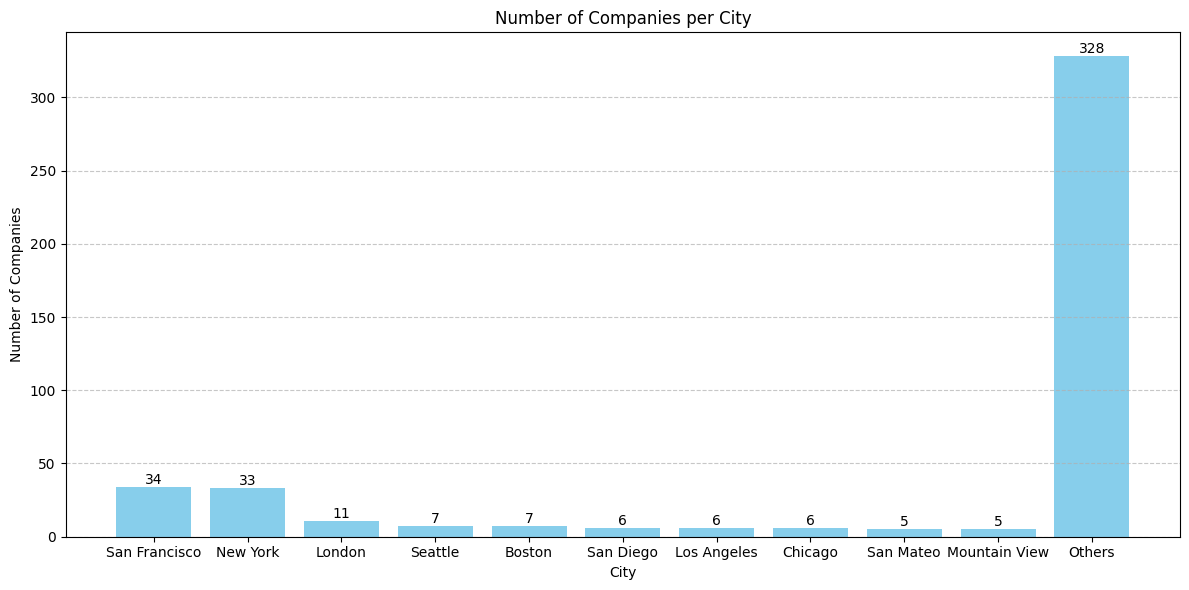

In [2]:
import services.sql_service as sql_service
from unidecode import unidecode
import pandas as pd
import services.dataframe_service as dataframe_service
import services.data_visualization_service as data_visualization_service
from repos.path_repo import assignment_output_path

data_frame = dataframe_service.read_csv(assignment_output_path)

# Query to get the city count
query = """
SELECT 
    city, 
    COUNT(*) AS city_count
FROM 
    company_info
GROUP BY 
    city
ORDER BY 
    city_count DESC;
"""
# Execute the query

results = sql_service.run_sql_query(data_frame,query)

data_visualization_service.plot_companies_per_city(results)

